In [1]:
import numpy as np
import matplotlib.pyplot as plt

求 `sin(10x)*x + cos(2x)*x` 在 `[-50, 50]` 范围内的最大值

In [2]:
# generate population

def generate_pop(pop_size, chrom_length):
    
    pop = np.random.randint(low=0, high=2, size=(pop_size,chrom_length))
    
    return pop

In [3]:
# convert binary DNA to decimal and normalize it to a range(-50, 50)

def transfer(pop, chrom_length, x_bound):
    
    # Transfer to decimal then normalized to [0,1]
    decimal = pop.dot(2 ** np.arange(chrom_length)[::-1]) / float(2**chrom_length - 1)
    
    # normalized to the needed range
    length = x_bound[1] - x_bound[0]
    pop_transfered = decimal * length + x_bound[0]
    
    return pop_transfered

In [4]:
# to find the maximum of this function
# It's target function

def F(x): 
    
    y = np.sin(10*x)*x + np.cos(2*x)*x     
    
    return y

In [5]:
# find non-zero fitness for selection
# fitness_score is the distance between the point and the min of all points

def fitness_score(y): 
    
    # 1e-3 is to make the min point have the chance to be selected
    fitness = y + 1e-3 - np.min(y)
    
    return fitness

In [6]:
# selection

def selection(pop, fitness):    
    
    # Selecte all points by fitness and return the index
    idx = np.random.choice(np.arange(len(pop)), size=len(pop), replace=True,
                           p=fitness/fitness.sum())
    
    # Get the selected population
    pop_selected = pop[idx].copy()
    
    return pop_selected

In [7]:
# crossover

def crossover(pop_selected, chrom_length, cross_rate):
    pop_crossed = list()
    pop_tmp = pop_selected.copy()
    
    for parent in pop_tmp:
        if np.random.rand() < cross_rate:
            
            # Randomly choose the crossover points
            cross_points = np.random.randint(0, 2, chrom_length).astype(np.bool)
            
            # Randomly choose one DNA from selected population as mate 
            mate = pop_selected[int(np.random.randint(0, len(pop), size=1))].copy()
            
            # Crossover
            parent[cross_points] = mate[cross_points]
            pop_crossed.append(list(parent))
        else:
            pop_crossed.append(list(parent))
            
    return  np.array(pop_crossed)

In [8]:
# mutation

def mutation(pop_crossed, chrom_length, mutation_rate):
    pop_mutated = list()
    pop_tmp = pop_crossed.copy()
    
    for child in pop_tmp:
        for i in range(chrom_length):
            if np.random.rand() < mutation_rate:
                if child[i] == 1:
                    child[i] = 0
                else:
                    child[i] = 1
        pop_mutated.append(list(child))
        
    return np.array(pop_mutated)

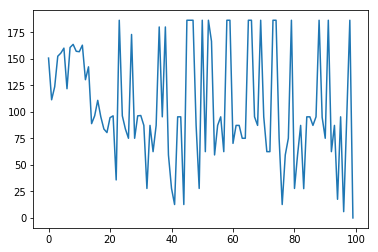

In [9]:
chrom_length = 10            # DNA length
pop_size = 100               # population size
cross_rate = 0.8             # mating probability (DNA crossover)
mutation_rate = 0.003        # mutation probability
n_generations = 100
x_bound = [-50, 50]          # x upper and lower bounds

if __name__ == '__main__':
    pop = generate_pop(pop_size, chrom_length)
    pop_new = pop.copy()
    tmp_ = list()
    
    
    for i in range(n_generations):
        pop_transfered = transfer(pop_new, chrom_length, x_bound)
        y = F(pop_transfered)
        fitness = fitness_score(y)
        pop_selected = selection(pop_new, fitness)
        pop_crossed = crossover(pop_selected, chrom_length, cross_rate)
        pop_mutated = mutation(pop_crossed, chrom_length, mutation_rate)
        pop_new = pop_mutated.copy()
        
        tmp_.append(max(fitness))
    
    # The mean of fitness per iteraion
    plt.plot(tmp_)

出现上图情况，就是因为当达到上限最大值之后，总会有交配或者突变使得种群的适应度下降的。

所以要选择合适的限制条件, 这里的限制条件就是n_generations

或者循环很多次, 然后将历届结果的最大值储存住, 完成循环之后, 那个最大值即为我们所需的值。| 最大值在一定循环次数内没有变化, 则可以停止循环